#### Orange cluster DEG analysis

In [1]:
library(limma)
library(dplyr)
library(ggplot2)
library(edgeR)
library(stringr)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
exp_df <- read.csv('../data/Expression_string_ppi.csv', header = T, row.names = 1)
head(exp_df)

,CTAG1A,USP16,FBXO27,PSMC6,RNF215,PGLYRP3,MRPS22,ZNF735,PGBD2,ERAP2,⋯,EXOC5P1,ZNF317,DHX9,CROCC2,CCNG1,YBX1,TMEM17,BCAP29,ZSCAN21,RPS10P16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
127399,10.725482,10.584193,13.508033,10.148792,9.991287,8.211031,10.50869,8.669221,10.489875,8.719983,⋯,8.990858,9.998337,10.477406,9.792913,10.565316,10.289390,10.778289,10.607616,10.600022,8.930965
143B,9.988517,9.873380,12.167203,10.853825,9.339054,8.211031,11.46019,8.669221,10.251736,7.703096,⋯,9.295713,9.881371,10.504871,7.470985,10.690832,10.013303,9.819016,10.410554,10.237587,8.930965
170MGBA,11.862986,11.081086,11.454823,10.949887,10.706711,8.211031,10.86856,8.669221,9.692161,13.947832,⋯,9.547251,10.267350,10.404635,9.792913,10.042473,10.041000,11.834549,12.017006,11.125816,8.193999
22RV1,14.018264,11.151668,10.152104,10.756197,10.747325,8.211031,10.56696,8.669221,11.822973,7.028192,⋯,10.631316,10.745512,11.129092,15.884613,11.236975,10.095626,11.224728,11.554170,10.443876,8.930965
2313287,11.210909,10.807002,9.488416,10.509159,10.451561,12.298493,10.18955,8.669221,11.550568,10.967499,⋯,10.631316,10.875875,10.270505,11.994547,9.386061,9.724608,11.547329,10.792402,9.889829,11.467018
253J,9.988517,9.625689,9.313329,9.583177,11.713174,8.211031,10.03110,8.669221,10.483544,13.425794,⋯,9.426957,10.367064,9.627861,11.377876,10.592568,10.209774,8.868719,9.671641,10.639996,10.515927


In [3]:
metadata_df <- read.csv('../data/Heatmap_data.csv', 
header = T, row.names = 1)
head(metadata_df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X38,X39,X40,actual_dep_EGFR,actual_IC50,pred_dep_EGFR,pred_IC50,Set,Benefit_Score,Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
JAR,15.915547,-22.859813,-0.7691427,-4.9968695,-5.71312997,5.1545830,20.466183,-19.0951935,14.149747,-13.211174,⋯,22.337796,-6.621750,-27.0886331,0.09028453,3.927320,-0.1548635,-0.1809607,Train,0.02609718,28
SW579,3.307600,21.728679,3.9040925,14.3755827,9.93307788,2.8349040,-8.400059,28.1029141,-3.569291,-18.598608,⋯,-1.645088,-3.465448,6.7488763,0.08847674,5.850220,-0.1326753,-0.3558464,Train,0.22317115,15
NALM6,-15.976866,-1.687740,4.6317850,0.6828229,-13.08871279,-0.1067554,-13.690220,10.5749188,-12.936290,9.070957,⋯,18.477408,19.310284,10.8947131,0.09508317,4.302570,-0.1138009,-1.7131870,Train,1.59938607,17
CAL27,-1.514111,-23.693551,-15.4564767,14.9179905,-4.92751051,-9.4378114,6.257871,-12.6511740,19.286334,10.480478,⋯,-9.504789,-4.685603,0.5766977,0.84359893,0.785326,0.2828296,-0.5940294,Train,0.87685894,5
SNU869,15.664793,17.959177,5.9445532,6.7294144,-0.05654935,-4.4238404,-15.444168,-0.5376746,12.671153,4.568913,⋯,6.933955,-8.301721,-0.4428101,0.10487289,11.958400,0.1721781,2.9320132,Train,-2.75983504,18
MELHO,24.357773,4.339891,14.6168880,-25.9796426,19.21024206,13.8500634,5.113348,9.8831623,-12.621851,5.872983,⋯,-8.185545,-11.574873,-3.7263814,0.33199676,5.429630,-0.2564824,1.1514897,Train,-1.40797200,11


In [4]:
exp_data <- t(exp_df)
exp_data <- exp_data[, rownames(metadata_df)]
head(exp_data)

,JAR,SW579,NALM6,CAL27,SNU869,MELHO,AMO1,KM12,GSU,HUH1,⋯,CL11,RL952,SIMA,CCK81,SKMEL2,CAMA1,NCIH226,NCIH1666,SNGM,A375
CTAG1A,11.21091,11.210909,8.403554,8.403554,9.988517,11.210909,14.184914,10.725482,10.725482,13.532837,⋯,11.210909,8.403554,9.988517,8.403554,9.988517,11.862986,12.491017,10.72548,12.103994,13.261535
USP16,10.53431,10.959324,10.478321,10.055152,11.613286,10.400120,10.924828,10.667353,10.188550,10.249119,⋯,10.210066,10.626177,10.429945,10.537634,11.980739,10.780063,10.402629,9.85084,9.821138,10.497440
FBXO27,12.72982,12.722051,4.359133,12.590620,13.129154,6.803917,10.798386,7.529058,5.437135,8.882695,⋯,6.398661,13.904955,8.349079,10.336413,9.693033,7.957392,12.575609,14.34640,11.484977,14.232064
PSMC6,11.30082,10.526919,10.076550,10.396488,11.243801,10.349690,10.026190,11.341469,11.229997,10.574164,⋯,10.465930,10.600109,10.148494,10.893572,11.081280,10.368234,10.632962,10.29151,10.101394,10.305472
RNF215,10.90908,11.047713,10.043774,9.504114,12.140765,9.926586,9.332180,10.729125,8.897195,9.827417,⋯,9.693027,11.070609,10.852556,9.494910,9.565482,12.294108,9.361172,10.41055,12.253526,10.429992
PGLYRP3,11.67046,8.211031,9.795993,18.862979,9.795993,8.211031,9.795993,8.211031,9.795993,9.795993,⋯,8.211031,13.568583,8.211031,9.795993,8.211031,11.018386,10.532959,15.78846,8.211031,9.795993


In [5]:
metadata_df$key_cluster <- ifelse(metadata_df$Cluster %in% c(5, 16, 19),
                                  "key_cluster",
                                  "not_key_cluster")
head(metadata_df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X39,X40,actual_dep_EGFR,actual_IC50,pred_dep_EGFR,pred_IC50,Set,Benefit_Score,Cluster,key_cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>
JAR,15.915547,-22.859813,-0.7691427,-4.9968695,-5.71312997,5.1545830,20.466183,-19.0951935,14.149747,-13.211174,⋯,-6.621750,-27.0886331,0.09028453,3.927320,-0.1548635,-0.1809607,Train,0.02609718,28,not_key_cluster
SW579,3.307600,21.728679,3.9040925,14.3755827,9.93307788,2.8349040,-8.400059,28.1029141,-3.569291,-18.598608,⋯,-3.465448,6.7488763,0.08847674,5.850220,-0.1326753,-0.3558464,Train,0.22317115,15,not_key_cluster
NALM6,-15.976866,-1.687740,4.6317850,0.6828229,-13.08871279,-0.1067554,-13.690220,10.5749188,-12.936290,9.070957,⋯,19.310284,10.8947131,0.09508317,4.302570,-0.1138009,-1.7131870,Train,1.59938607,17,not_key_cluster
CAL27,-1.514111,-23.693551,-15.4564767,14.9179905,-4.92751051,-9.4378114,6.257871,-12.6511740,19.286334,10.480478,⋯,-4.685603,0.5766977,0.84359893,0.785326,0.2828296,-0.5940294,Train,0.87685894,5,key_cluster
SNU869,15.664793,17.959177,5.9445532,6.7294144,-0.05654935,-4.4238404,-15.444168,-0.5376746,12.671153,4.568913,⋯,-8.301721,-0.4428101,0.10487289,11.958400,0.1721781,2.9320132,Train,-2.75983504,18,not_key_cluster
MELHO,24.357773,4.339891,14.6168880,-25.9796426,19.21024206,13.8500634,5.113348,9.8831623,-12.621851,5.872983,⋯,-11.574873,-3.7263814,0.33199676,5.429630,-0.2564824,1.1514897,Train,-1.40797200,11,not_key_cluster


In [6]:
metadata_df$score_cat <- ifelse(metadata_df$Benefit_Score > median(metadata_df$Benefit_Score),
    'high_score', 'low_score')
metadata_df$score_cat <- factor(metadata_df$score_cat, levels = c('low_score', 'high_score'))
metadata_df$key_cluster <- factor(metadata_df$key_cluster, levels = c('not_key_cluster', 'key_cluster'))

In [7]:
head(metadata_df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X40,actual_dep_EGFR,actual_IC50,pred_dep_EGFR,pred_IC50,Set,Benefit_Score,Cluster,key_cluster,score_cat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<fct>,<fct>
JAR,15.915547,-22.859813,-0.7691427,-4.9968695,-5.71312997,5.1545830,20.466183,-19.0951935,14.149747,-13.211174,⋯,-27.0886331,0.09028453,3.927320,-0.1548635,-0.1809607,Train,0.02609718,28,not_key_cluster,high_score
SW579,3.307600,21.728679,3.9040925,14.3755827,9.93307788,2.8349040,-8.400059,28.1029141,-3.569291,-18.598608,⋯,6.7488763,0.08847674,5.850220,-0.1326753,-0.3558464,Train,0.22317115,15,not_key_cluster,high_score
NALM6,-15.976866,-1.687740,4.6317850,0.6828229,-13.08871279,-0.1067554,-13.690220,10.5749188,-12.936290,9.070957,⋯,10.8947131,0.09508317,4.302570,-0.1138009,-1.7131870,Train,1.59938607,17,not_key_cluster,high_score
CAL27,-1.514111,-23.693551,-15.4564767,14.9179905,-4.92751051,-9.4378114,6.257871,-12.6511740,19.286334,10.480478,⋯,0.5766977,0.84359893,0.785326,0.2828296,-0.5940294,Train,0.87685894,5,key_cluster,high_score
SNU869,15.664793,17.959177,5.9445532,6.7294144,-0.05654935,-4.4238404,-15.444168,-0.5376746,12.671153,4.568913,⋯,-0.4428101,0.10487289,11.958400,0.1721781,2.9320132,Train,-2.75983504,18,not_key_cluster,low_score
MELHO,24.357773,4.339891,14.6168880,-25.9796426,19.21024206,13.8500634,5.113348,9.8831623,-12.621851,5.872983,⋯,-3.7263814,0.33199676,5.429630,-0.2564824,1.1514897,Train,-1.40797200,11,not_key_cluster,low_score


In [8]:
design_mat <- model.matrix(~ key_cluster + score_cat, data = metadata_df)

In [9]:
dim(design_mat)

[1] 658   3

In [10]:
library(edgeR)

For previously normalised data, use trend == TRUE

In [11]:
exp_df <- t(exp_df) # samples as columns
exp_df <- exp_df[, rownames(design_mat)]

In [12]:
dim(exp_df)

[1] 24963   658

In [13]:
fit <- lmFit(exp_df, design_mat)

In [14]:
fit2 <- eBayes(fit, trend = TRUE)

In [15]:
topTable(fit2, coef = "key_clusterkey_cluster", number = 10)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SERPINB13,7.230360,10.775275,17.38282,5.807530e-56,1.449734e-51,116.16962
KLK9,4.915550,8.473921,15.99149,7.378541e-49,9.209526e-45,100.05383
SPRR2E,4.617357,8.112208,15.56703,9.670833e-47,8.047100e-43,95.25020
SERPINB11,5.989888,9.302316,15.53500,1.393983e-46,8.699501e-43,94.88997
GBP6,6.290442,10.749120,15.45489,3.472304e-46,1.517555e-42,93.99083
SERPINB3,6.623607,10.005586,15.45057,3.647530e-46,1.517555e-42,93.94233
SPRR4,2.722055,8.965035,15.37199,8.909830e-46,3.177373e-42,93.06246
KRT6C,5.314262,9.988411,15.09096,2.135299e-44,6.662933e-41,89.93297
SPRR1B,6.381613,9.943725,15.00154,5.832474e-44,1.617734e-40,88.94307


In [16]:
res <- topTable(fit2, coef = "key_clusterkey_cluster", number = Inf)

In [17]:
res %>%
  filter(abs(logFC) > 1 & adj.P.Val < 0.05) %>%
  dim()

[1] 3630    6

In [18]:
write.csv(res, file = '../results/depMap_keyCluster_deg.csv')

In [19]:
saveRDS(fit2,file = '../results/depMap_keyCluster_deg_fit.RDS')

In [20]:
df <- res %>%
  filter(!is.na(logFC), !is.na(adj.P.Val))
df$gene <- rownames(df)
# Create a column for significance
df <- df %>%
  mutate(
    sig = case_when(
      adj.P.Val < 0.01 & logFC > 1 ~ "Upregulated",
      adj.P.Val < 0.01 & logFC < -1 ~ "Downregulated",
      TRUE ~ "Non-significant"
    )
  )

# Identify top 10 upregulated and downregulated genes
top_up <- df %>%
  filter(sig == "Upregulated") %>%
  top_n(10, logFC)

top_down <- df %>%
  filter(sig == "Downregulated") %>%
  top_n(-10, logFC)

top_genes <- bind_rows(top_up, top_down)
top_gene_list <- rownames(top_genes)


In [21]:
df$top_gene <- ifelse(df$gene %in% top_gene_list, df$gene, NA)

In [22]:
library(ggrepel)

In [23]:
head(df)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,sig,top_gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
SERPINB13,7.230360,10.775275,17.38282,5.807530e-56,1.449734e-51,116.16962,SERPINB13,Upregulated,SERPINB13
KLK9,4.915550,8.473921,15.99149,7.378541e-49,9.209526e-45,100.05383,KLK9,Upregulated,NA
SPRR2E,4.617357,8.112208,15.56703,9.670833e-47,8.047100e-43,95.25020,SPRR2E,Upregulated,NA
SERPINB11,5.989888,9.302316,15.53500,1.393983e-46,8.699501e-43,94.88997,SERPINB11,Upregulated,NA
GBP6,6.290442,10.749120,15.45489,3.472304e-46,1.517555e-42,93.99083,GBP6,Upregulated,GBP6
SERPINB3,6.623607,10.005586,15.45057,3.647530e-46,1.517555e-42,93.94233,SERPINB3,Upregulated,SERPINB3


In [24]:
table(df$sig)


  Downregulated Non-significant     Upregulated 
            854           21781            2328 

Warning message:
“Removed 24943 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


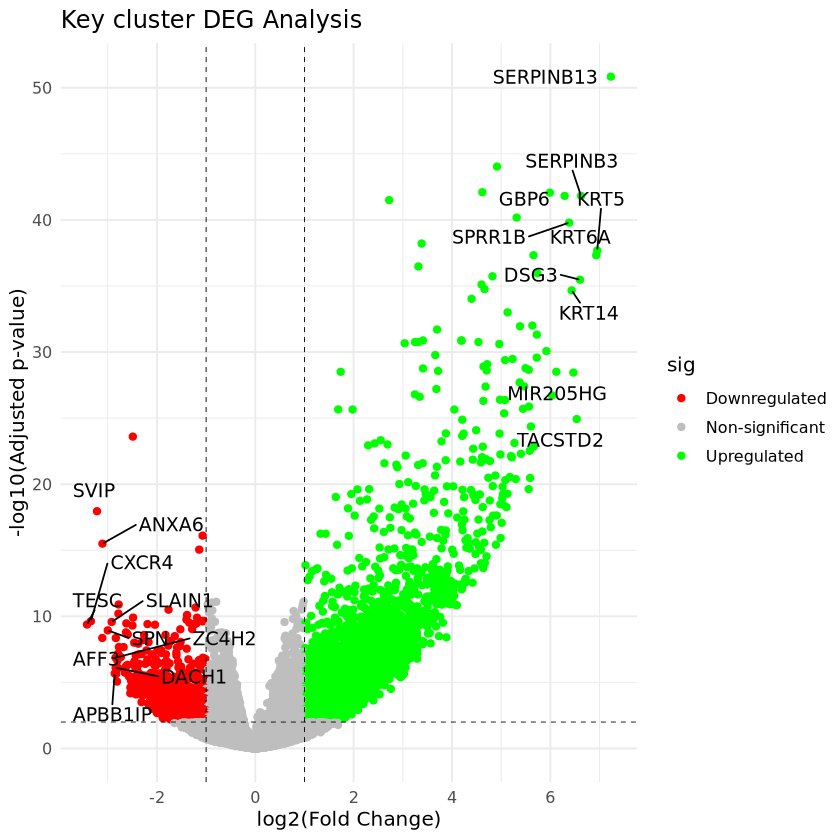

In [26]:
ggplot(df, aes(x = logFC, y = -log10(adj.P.Val), color = sig)) +
  geom_point() +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "black", linewidth = 0.25) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "black", linewidth = 0.25) +
  geom_text_repel(
    data = df,
    aes(x = logFC, y = -log10(adj.P.Val), label = top_gene),
    size = 4,
    color = "black",
    box.padding = 0.5,
    max.overlaps = 50
  ) +
  scale_color_manual(
    values = c(
      "Downregulated" = "red",
      "Upregulated" = "green",
      "Non-significant" = "grey"
    ),
    na.value = "grey"  # ensures NA gets grey color
  ) +
  labs(
    title = "Key cluster DEG Analysis",
    x = "log2(Fold Change)",
    y = "-log10(Adjusted p-value)"
  ) +
  theme_minimal(base_size = 12) 

In [27]:
# Identify top 10 upregulated and downregulated genes
top_up <- df %>%
  filter(sig == "Upregulated") %>%
  head(100)

top_down <- df %>%
  filter(sig == "Downregulated") %>%
  head(100)

top_genes <- bind_rows(top_up, top_down)
top_gene_list <- rownames(top_genes)

In [28]:
length(top_gene_list)

[1] 200

In [29]:
writeLines(top_gene_list, con = '../results/depMap_keyCluster_topDEG.txt')

Use the above file for enrichment analysis